In [1]:

path='G:/Shared drives/BeStarsMiMeS/ScienceFiles/' #Patrick's google file stream path
#import LSDpy.lsdpy
#import specpolFlow as pol


import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import itertools

import pyRaven as rav
import scipy
import specpolFlow as pol

In [2]:
#Accessing the google sheets

sheet_id = '1M6y1Wnsrc-w5FjUMfKaSFa_-foIDAaMe8W4lYNWnWyk'
sheet_name = 'Stars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData=pd.read_csv(url)

sheet_name = 'Observations'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
Observations=pd.read_csv(url)

In [3]:
def wl_to_vel(wl,center):
    wl=wl*u.nm
    center=center*u.nm
    vel = ((wl - center)/center * const.c).to(u.km/u.s)
    return(vel.value)

def vel_to_wl(vel,center):
    vel=vel*u.km/u.s
    center=center*u.nm
    wl = ((vel*center)/(const.c)).to(u.nm)+center
    return(wl.value)

In [41]:
M=7.7*u.M_sun
R=5.75*u.R_sun
G=const.G

np.sqrt(G*M/R).to(u.km/u.s)

<Quantity 505.42445978 km / s>

## HD 90966

In [4]:
star='hd90966'
nobs=1
ModelCode=StarData['ModelCode'][StarData['Name']==star].values[0]
file = '{}00-InputMaterial/NormalizedSpectra/{}_{}.s'.format(path,star, nobs)
spectra=pol.read_spectrum(file)

maskfile='{}02-Mask-calculations/MaskCleaning/depth0.02_tellClean/{}_{}_depth0.02.mask'.format(path,ModelCode,star)
mask=pol.read_mask(maskfile)

(0.6, 1.1)

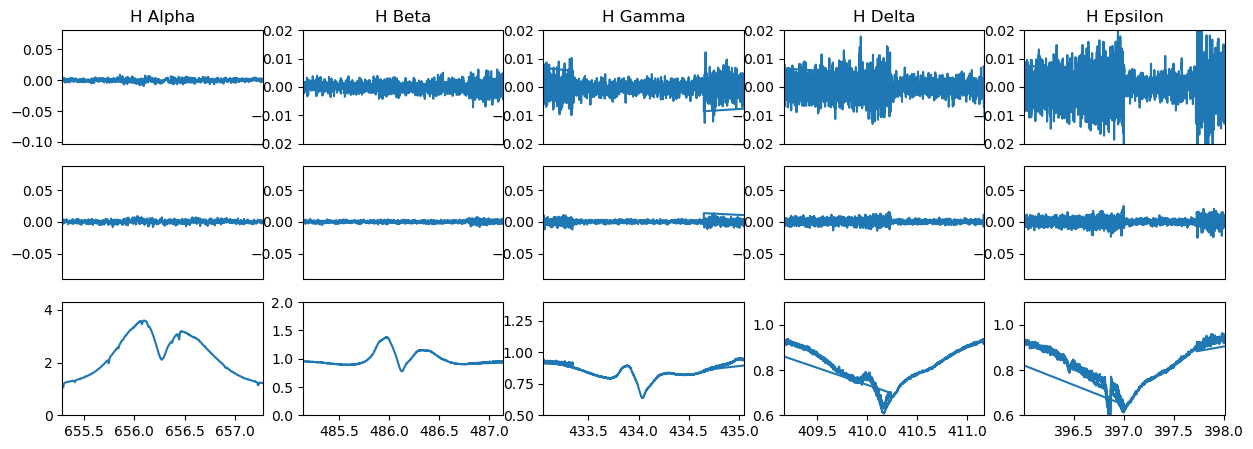

In [5]:
fig, ax = plt.subplots(3,5,sharex=False,figsize=(15,5))

ax[0,0].plot(spectra.wl,spectra.specV)
ax[0,0].set_xlim(656.281-1,656.281+1)
ax[0,0].set_title('H Alpha')
ax[0,0].set_xticks([])
ax[1,0].plot(spectra.wl,spectra.specN1)
ax[1,0].set_xlim(656.281-1,656.281+1)
ax[1,0].set_xticks([])
ax[2,0].plot(spectra.wl,spectra.specI)
ax[2,0].set_xlim(656.281-1,656.281+1)
ax[2,0].set_ylim(0,4.3)

ax[0,1].plot(spectra.wl,spectra.specV)
ax[0,1].set_xlim(486.14-1,486.14+1)
ax[0,1].set_title('H Beta')
ax[0,1].set_ylim(-0.02,0.02)
ax[0,1].set_xticks([])
ax[1,1].plot(spectra.wl,spectra.specN1)
ax[1,1].set_xlim(486.14-1,486.14+1)
ax[1,1].set_xticks([])
ax[2,1].plot(spectra.wl,spectra.specI)
ax[2,1].set_xlim(486.14-1,486.14+1)
ax[2,1].set_ylim(0,2)

ax[0,2].plot(spectra.wl,spectra.specV)
ax[0,2].set_xlim(434.05-1,434.05+1)
ax[0,2].set_title('H Gamma')
ax[0,2].set_xticks([])
ax[0,2].set_ylim(-0.02,0.02)
ax[1,2].plot(spectra.wl,spectra.specN1)
ax[1,2].set_xlim(434.05-1,434.05+1)
ax[1,2].set_xticks([])
ax[2,2].plot(spectra.wl,spectra.specI)
ax[2,2].set_xlim(434.05-1,434.05+1)
ax[2,2].set_ylim(0.5,1.4)

ax[0,3].plot(spectra.wl,spectra.specV)
ax[0,3].set_xlim(410.17-1,410.17+1)
ax[0,3].set_title('H Delta')
ax[0,3].set_xticks([])
ax[0,3].set_ylim(-0.02,0.02)
ax[1,3].plot(spectra.wl,spectra.specN1)
ax[1,3].set_xlim(410.17-1,410.17+1)
ax[1,3].set_xticks([])
ax[2,3].plot(spectra.wl,spectra.specI)
ax[2,3].set_xlim(410.17-1,410.17+1)
ax[2,3].set_ylim(0.6,1.1)

ax[0,4].plot(spectra.wl,spectra.specV)
ax[0,4].set_xlim(397.01-1,397.01+1)
ax[0,4].set_title('H Epsilon')
ax[0,4].set_xticks([])
ax[0,4].set_ylim(-0.02,0.02)
ax[1,4].plot(spectra.wl,spectra.specN1)
ax[1,4].set_xlim(397.01-1,397.01+1)
ax[1,4].set_xticks([])
ax[2,4].plot(spectra.wl,spectra.specI)
ax[2,4].set_xlim(397.01-1,397.01+1)
ax[2,4].set_ylim(0.6,1.1)

In [49]:
line1=438.8
line2=447.3
line3=667.8
line4=426.7
line5=468.6

line=455.3

element=mask.element[np.where(np.abs(mask.wl-line)<=1)]
wl=mask.wl[np.where(np.abs(mask.wl-line)<=1)]
depth=mask.depth[np.where(np.abs(mask.wl-line)<=1)]
pd.DataFrame([element,wl,depth],index=['Element','Wavelength','Depth']).T

,Element,Wavelength,Depth
0,18.01,454.5052,0.049
1,26.01,454.9466,0.050
2,16.01,455.2410,0.172
3,7.01,455.2522,0.086
4,14.02,455.2622,0.372
5,14.02,455.3997,0.022
6,26.01,455.5887,0.036


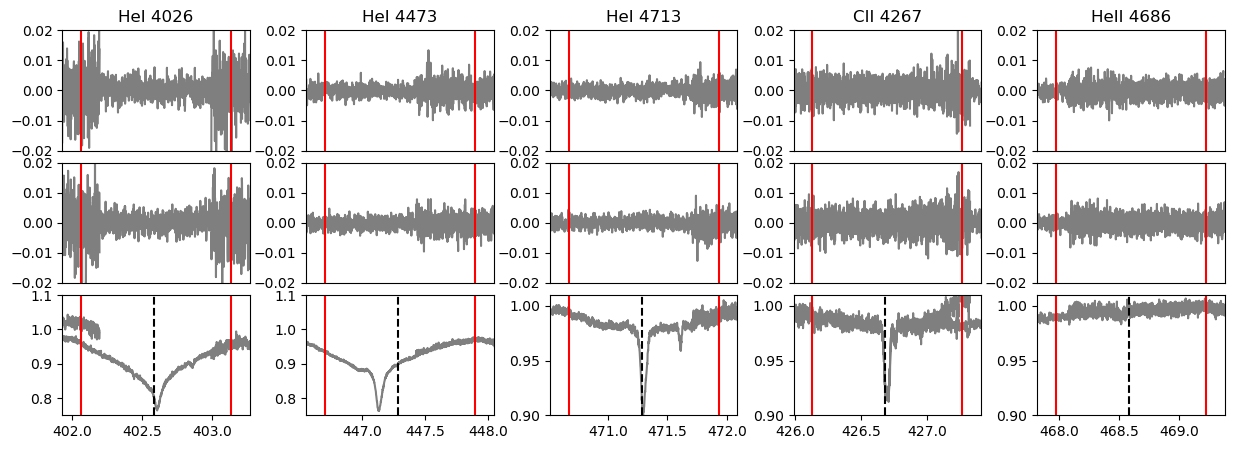

In [7]:
fig, ax = plt.subplots(3,5,sharex=False,figsize=(15,5))
vsini=400

#line1=438.8
#line1_name='HeI 4388'
line1=402.6
line1_name='HeI 4026'
line2=447.14
line2_name='HeI 4471'
#line3=667.8
line3=471.3
#line3_name='HeI 6678'
line3_name='HeI 4713'
line4=426.7
line4_name='CII 4267'
line5=468.6
line5_name='HeII 4686'

lines=[line1,line2,line3,line4,line5]
names=[line1_name,line2_name,line3_name,line4_name,line5_name]

specV_ylim_adjust=[[0,0],[0,0],[0,0],[0,0],[0,0]]
specN1_ylim_adjust=[[0,0],[0,0],[0,0],[0,0],[0,0]]
specI_ylim_adjust=[[0.75,0.1],[0.75,0.1],[0.9,0.01],[0.9,0.01],[0.9,0.01]]

rv1=-10.674737
rv2=0

wave=spectra.wl
specV=spectra.specV
specN1=spectra.specN1
specI=spectra.specI

for i in range(wave.size-1):
    if wave[i+1]-wave[i] <0:
        wave=np.insert(wave,i+1,np.nan)
        specV=np.insert(specV,i+1,np.nan)
        specN1=np.insert(specN1,i+1,np.nan)
        specI=np.insert(specI,i+1,np.nan)


for l in range(5):
    ax[0,l].plot(wave,specV,color='black',alpha=0.5)
    ax[0,l].set_xlim(vel_to_wl(-vsini-100,lines[l]),vel_to_wl(vsini+100,lines[l]))
    ax[0,l].set_title(names[l])
    ax[0,l].set_ylim(-0.02+specV_ylim_adjust[l][0],0.02+specV_ylim_adjust[l][1])
    ax[0,l].set_xticks([])
    ax[1,l].plot(wave,specN1,color='black',alpha=0.5)
    ax[1,l].set_xlim(vel_to_wl(-vsini-100,lines[l]),vel_to_wl(vsini+100,lines[l]))
    ax[1,l].set_ylim(-0.02+specN1_ylim_adjust[l][0],0.02+specN1_ylim_adjust[l][1])
    ax[1,l].set_xticks([])
    ax[2,l].plot(wave,specI,color='black',alpha=0.5)
    ax[2,l].set_xlim(vel_to_wl(-vsini-100,lines[l]),vel_to_wl(vsini+100,lines[l]))
    ax[2,l].set_ylim(0+specI_ylim_adjust[l][0],1+specI_ylim_adjust[l][1])


    ax[0,l].vlines([vel_to_wl(-vsini,lines[l]),vel_to_wl(vsini,lines[l])],-0.02+specV_ylim_adjust[l][0],0.02+specV_ylim_adjust[l][1],color='r')
    ax[1,l].vlines([vel_to_wl(-vsini,lines[l]),vel_to_wl(vsini,lines[l])],-0.02+specN1_ylim_adjust[l][0],0.02+specN1_ylim_adjust[l][1],color='r')
    ax[2,l].vlines([vel_to_wl(-vsini,lines[l]),vel_to_wl(vsini,lines[l])],0+specI_ylim_adjust[l][0],1+specI_ylim_adjust[l][1],color='r')

    ax[2,l].vlines([vel_to_wl(rv1,lines[l])],0+specI_ylim_adjust[l][0],1+specI_ylim_adjust[l][1],color='black',linestyle='dashed',zorder=0)



fig.subplots_adjust(hspace=0.1,wspace=0.3)

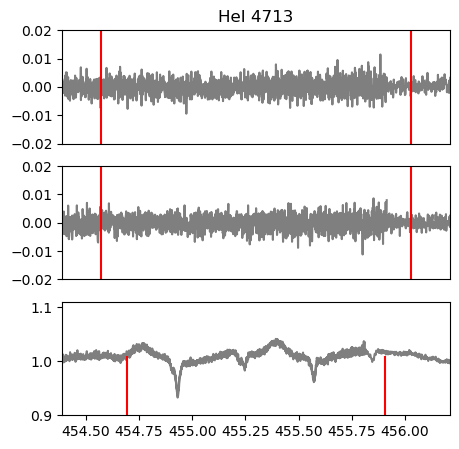

In [51]:
l=2

lines[l]=455.3

fig, ax = plt.subplots(3,1,sharex=False,figsize=(5,5))

ax[0].plot(wave,specV,color='black',alpha=0.5)
ax[0].set_xlim(vel_to_wl(-vsini-100,lines[l]),vel_to_wl(vsini+100,lines[l]))
ax[0].set_title(names[l])
ax[0].set_ylim(-0.02+specV_ylim_adjust[l][0],0.02+specV_ylim_adjust[l][1])
ax[0].set_xticks([])
ax[1].plot(wave,specN1,color='black',alpha=0.5)
ax[1].set_xlim(vel_to_wl(-vsini-100,lines[l]),vel_to_wl(vsini+100,lines[l]))
ax[1].set_ylim(-0.02+specN1_ylim_adjust[l][0],0.02+specN1_ylim_adjust[l][1])
ax[1].set_xticks([])
ax[2].plot(wave,specI,color='black',alpha=0.5)
ax[2].set_xlim(vel_to_wl(-vsini-200,lines[l]),vel_to_wl(vsini+200,lines[l]))
ax[2].set_ylim(0+specI_ylim_adjust[l][0],1+specI_ylim_adjust[l][1]+.1)


ax[0].vlines([vel_to_wl(-vsini,lines[l]),vel_to_wl(vsini,lines[l])],-0.02+specV_ylim_adjust[l][0],0.02+specV_ylim_adjust[l][1],color='r')
ax[1].vlines([vel_to_wl(-vsini,lines[l]),vel_to_wl(vsini,lines[l])],-0.02+specN1_ylim_adjust[l][0],0.02+specN1_ylim_adjust[l][1],color='r')
ax[2].vlines([vel_to_wl(-vsini,lines[l]),vel_to_wl(vsini,lines[l])],0+specI_ylim_adjust[l][0],1+specI_ylim_adjust[l][1],color='r')

plt.show()

In [44]:
trim_wl=wave[np.where((wave >= vel_to_wl(-2*vsini,555.5)) & (wave<=vel_to_wl(2*vsini,555.5)))[0]]
trim_specI=specI[np.where((wave >= vel_to_wl(-2*vsini,555.5)) & (wave<=vel_to_wl(2*vsini,555.5)))[0]]
trim_specSigI=np.ones(trim_wl.size)*trim_specI.std()
trim_vel=wl_to_vel(trim_wl,555.5)

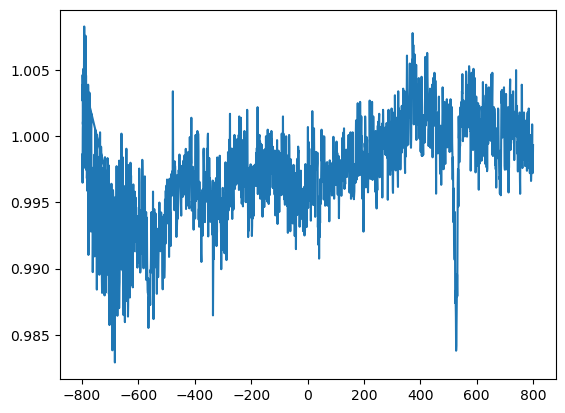

In [45]:
plt.plot(trim_vel,trim_specI)

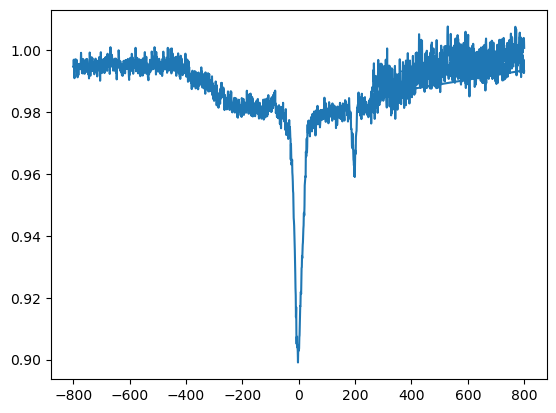

In [35]:
#inputs
nobs=1
param_to_fit = [['vsini','logkappa','vmac','vrad']]#,['vsini','logkappa','vmac','vrad']] #[[star1],[star2]]
guess = [[60,np.log(0.4),30,[-10]]]#,[30,np.log(0.51),30,[10]]]
bounds = [[(10,600),(-2,2),(0,40),[(-300,300)]*nobs]]#,[(10,600),(-2,2),(0,40),[(-300,300)]*nobs]]

genparam = {
    'lambda0':5811.969,    # the central wavelength of the transition
    'vsini':224.52037414,         # the projected rotational velocity
    'vdop':10.0,          # the thermal broadening
    'av':0.05,             # the damping coefficient of the Voigt profile
    'bnu':1.5,             # the slope of the source function with respect to vertical optical depth
    'logkappa':np.log(1.3),          # the line strength parameter
    'Bpole':1.0e1,         # the dipolar field strength
    'incl':np.pi/4,      # the inclination of the rotational axis to the line of sight
    'beta':np.pi/4,      # the obliquity of the magnetic axis to the rotational axis
    'phase':0.0,     # the rotational phase
    'ndop':int(100),       # the number of sample point per doppler width for the wavelength array
    'vrad':[0]
    }
unnoparam = {
    'down':[0.5,0, 0.5],   # the s, j, l of the lower level
    'up':[0.5, 1, 0.5]    # the s, j, l of the upper level
    }
weakparam = {
    'geff':1.0,
    }
param={'general' : genparam,
    'unno' : unnoparam,
    'weak' : weakparam}
param['general'].update({'res': 65000.})
param['general'].update({'vmac': 10.})
param['general'].update({'vrad': [0]})

parameters=[param]#,param]


xs=[]
ys=[]
ys_err=[]
for o in range(nobs):
    xs.append(trim_vel)
    ys.append(trim_specI)
    ys_err.append(trim_specSigI)

lsds=[xs,ys,ys_err]

#two,one,ui=fun(res.x,param_to_fit,parameters,DataPacket)
#one,ui,star=fun(np.append(np.hstack(guess[0]),np.hstack(guess[1])),param_to_fit,parameters,DataPacket,guess)
#plt.plot(np.hstack(xs),np.hstack(ys))
#plt.plot(np.hstack(xs),two)

#plt.plot(xs[0],ui[0])
#plt.plot(xs[0],ui[3])
plt.plot(xs[0],ys[0])

In [36]:
res,star=rav.fitparams.fitting(param_to_fit,parameters,lsds,guess,bounds)

In [37]:
res.x

array([428.56301091,   1.34591445,  40.        ,  18.1421218 ])

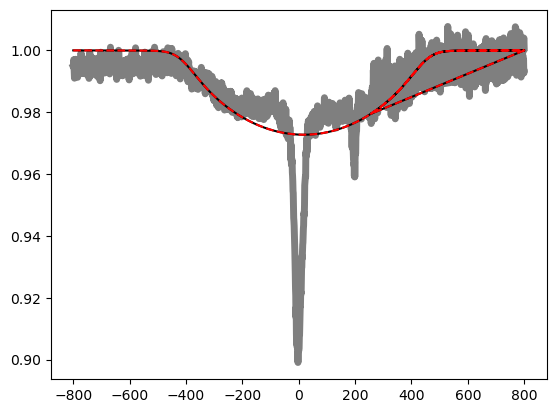

In [39]:
fitmodels=rav.fitparams.param_to_model(star,lsds)
fit1=rav.fitparams.param_to_model([star[0]],lsds)
#fit2=rav.fitparams.param_to_model([star[1]],lsds)

plt.plot(xs[0],ys[0],linewidth=5,color='black',alpha=0.5,zorder=0)
plt.plot(xs[0],fitmodels[0],color='black')
plt.plot(xs[0],fit1[0],color='red',linestyle='dashed')
#plt.plot(xs[0],fit2[0],color='blue',linestyle='dashed')

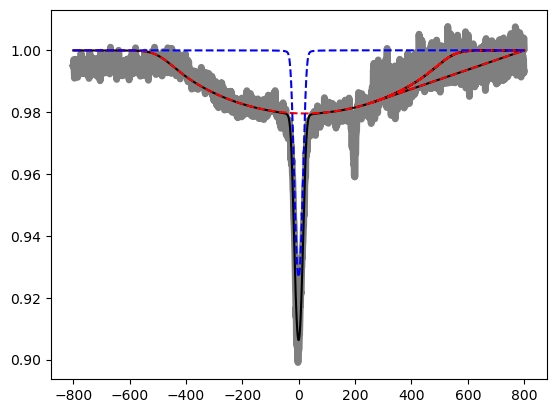

In [34]:
fitmodels=rav.fitparams.param_to_model(star,lsds)
fit1=rav.fitparams.param_to_model([star[0]],lsds)
fit2=rav.fitparams.param_to_model([star[1]],lsds)

plt.plot(xs[0],ys[0],linewidth=5,color='black',alpha=0.5,zorder=0)
plt.plot(xs[0],fitmodels[0],color='black')
plt.plot(xs[0],fit1[0],color='red',linestyle='dashed')
plt.plot(xs[0],fit2[0],color='blue',linestyle='dashed')